# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Yoga Permana Sukma]
- **Email:** [yogapermanasukma102@gmail.com]
- **ID Dicoding:** [yogapermanasdicod20]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan polusi udara di station Changping dari waktu ke waktu?
- Apakah terdapat pola hubungan antara temperatur (TEMP) dan hujan (RAIN) dengan kualitas udara di Changping?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#Gathering Data (Baca File)
import pandas as pd
df_Changping = pd.read_csv('https://raw.githubusercontent.com/YogaPermanaSukma1008/Submission/refs/heads/main/Data/PRSA_Data_Changping_20130301-20170228.csv')
df_Changping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- Dataset ini merupakan dataset kualitas udara (polusi udara) yang diukur melalui beberapa indikator udara seperti PM2.5, PM10, SO2, NO2, CO, dan O3.
- Dataset tersebut termasuk dalam data time series yang didalamnya terdapat periode tahun, bulan, hari, dan jam pada station changping.
- Terdapat beberapa faktor yang diduga mempengaruhi kualitas udara yakni TEMP, PRES, DEWP, RAIN.

### Assessing Data

In [3]:
#Melihat info data
df_Changping.info()

#melihat jumlah data missing
df_Changping.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [4]:
#melihat jumlah data duplikat
print('Jumlah data duplikat:', df_Changping.duplicated().sum())
#Summary Statistic
df_Changping.describe()

Jumlah data duplikat: 0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**
- Berdasarkan hasil assesing tersebut hampir semua variabel data memiliki missing value kecuali No, year, month, day, hour, dan station.
- Missing value terbesar terletak pada variabel CO sebesar (1521).
- Jumlah duplikasi pada data tersebut 0 atau tidak ada duplikasinya.

### Cleaning Data

In [ ]:
# Mengatasi Missing Value (Mengisi dengan mean atau rata rata) khusus pada data numerik
df_Changping['PM2.5'].fillna(df_Changping['PM2.5'].mean())
df_Changping['PM10'].fillna(df_Changping['PM10'].mean())
df_Changping['SO2'].fillna(df_Changping['SO2'].mean())
df_Changping['NO2'].fillna(df_Changping['NO2'].mean())
df_Changping['CO'].fillna(df_Changping['CO'].mean())
df_Changping['O3'].fillna(df_Changping['O3'].mean())
df_Changping['TEMP'].fillna(df_Changping['TEMP'].mean())
df_Changping['PRES'].fillna(df_Changping['PRES'].mean())
df_Changping['DEWP'].fillna(df_Changping['DEWP'].mean())
df_Changping['RAIN'].fillna(df_Changping['RAIN'].mean())
df_Changping['WSPM'].fillna(df_Changping['WSPM'].mean())

,WSPM
0,0.5
1,0.7
2,0.2
3,1.0
4,2.1
...,...
35059,1.3
35060,2.1
35061,1.5
35062,1.4


In [ ]:
# Mengatasi missing value pada data nominal dengan mengisi nilai yang dominan
df_Changping.wd.value_counts()
df_Changping['wd'].fillna('NNW')


,wd
0,E
1,ENE
2,ENE
3,NNE
4,N
...,...
35059,NNE
35060,N
35061,N
35062,NW


In [ ]:
# Melihat kembali jumlah missing value
df_Changping.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


**Insight:**
- Missing value pada kategori data numerik diisi dengan rata-rata pada masing-masing variabel.
- Missing value pada kategori data nominal diisi dengan nilai yang dominan (NNW)

In [ ]:
df_Changping.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [ ]:
#Menyimpan dataframe yang telah selesai proses cleaning menjadi dataframe baru
df_Changping.to_csv("all_data.csv", index = False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Summary Statistic (Include All)
df_Changping.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.524179,82.746329,20.786642,29.237672,1078.866266,53.846809,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,129.000000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [ ]:
# Pivot tabel rata-rata masing-masing polutan pada berbagai tingkat temperature
df_Changping.groupby(by='TEMP').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})

,PM2.5,PM10,SO2,NO2,CO,O3
TEMP,,,,,,
-16.6,5.0,17.0,7.0,16.0,800.0,56.0
-16.5,10.0,16.0,6.0,15.0,700.0,56.0
-16.2,8.0,23.0,7.0,15.0,800.0,58.0
-16.1,5.0,36.0,5.0,12.0,700.0,60.0
-15.9,14.0,98.0,5.0,19.0,900.0,52.0
...,...,...,...,...,...,...
39.8,33.0,35.0,8.0,23.5,400.0,118.5
40.0,3.0,23.0,2.0,20.0,100.0,129.0
40.5,11.0,25.5,5.5,21.0,200.0,138.0


insight
- Berdasarkan pivot ini, dapat disimpulkan bahwa polutan O3 semakin tinggi apabila suhu semakin tinggi.

In [28]:
# Pivot tabel rata-rata masing-masing polutan pada berbagai tingkat tekanan
df_Changping.groupby(by='PRES').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})

,PM2.5,PM10,SO2,NO2,CO,O3
PRES,,,,,,
982.4,41.000000,98.000000,2.0,11.000000,300.000000,103.0
982.7,35.000000,76.000000,2.0,9.000000,300.000000,103.0
982.8,46.000000,83.000000,2.0,16.000000,300.000000,95.0
982.9,20.000000,28.000000,4.0,4.000000,400.000000,151.0
983.0,29.000000,29.000000,2.0,19.000000,300.000000,100.0
...,...,...,...,...,...,...
1036.0,11.333333,47.666667,6.0,16.333333,766.666667,55.0
1036.1,9.000000,68.000000,5.0,17.000000,800.000000,53.0
1036.2,8.000000,30.000000,4.0,14.000000,700.000000,59.0


Insight
- Ada kemungkinan bahwa semakin tinggi tekanan polutan CO semakin tinggi pula

In [29]:
# Pivot tabel rata-rata masing-masing polutan pada berbagai tingkat curah hujan
df_Changping.groupby(by='RAIN').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})

,PM2.5,PM10,SO2,NO2,CO,O3
RAIN,,,,,,
0.0,71.575850,95.795023,15.361680,44.559829,1156.758788,58.353638
0.1,68.262238,74.052448,5.292652,39.894005,1109.747292,41.978260
0.2,63.354167,69.840278,5.191743,39.152001,1179.107914,36.214593
0.3,61.223140,66.049587,6.714193,36.919822,1112.156522,41.525423
0.4,54.507042,56.802817,4.523020,34.055541,1019.088235,44.699482
...,...,...,...,...,...,...
26.5,34.000000,34.000000,2.000000,7.000000,300.000000,143.000000
28.7,122.000000,122.000000,2.000000,18.000000,700.000000,190.000000
28.9,88.000000,88.000000,2.000000,14.000000,700.000000,152.000000


Insight
- Curah hujan yang lebih tinggi membuat polutan SO, NO2, dan CO yang lebih rendah

In [ ]:
df_Changping.groupby(by='wd').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})

,PM2.5,PM10,SO2,NO2,CO,O3
wd,,,,,,
E,94.414038,121.488426,17.504907,48.610458,1318.299736,68.318722
ENE,84.892103,108.298450,16.696018,50.534121,1344.652767,52.679558
ESE,99.202819,125.373770,18.672773,48.180306,1315.945648,76.045827
N,63.925357,81.828993,13.650230,43.954728,1134.064436,44.259331
NE,63.215339,83.894373,13.746973,44.058176,1065.183414,51.016294
NNE,60.527533,78.791139,14.250974,43.312155,1072.426645,48.255661
NNW,67.753459,86.198810,12.873208,44.684911,1192.575738,41.056428
NW,57.603304,80.620951,12.472390,40.986167,1057.621053,42.670679
S,75.971524,102.368769,17.441904,43.377628,1186.518541,93.647202


**Insight:**
- konsentrasi polutan PM2.5 dan PM10 tertinggi berada pada arah ENE - E - ESE.
- konsentrasi polutan O3 berada pada arah SE-SSE-S

In [ ]:
df_Changping.groupby(by='month').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})

,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
1,83.974358,104.621350,31.997680,57.473090,1852.184001,27.739046
2,79.731227,97.033156,29.005420,48.097686,1383.010425,37.828038
3,84.046066,129.494256,25.689319,55.047254,1247.140318,50.542202
4,69.567422,108.431112,11.599498,41.201785,791.904118,70.582991
5,60.427987,95.985551,12.001953,34.437991,714.800752,91.868250
6,60.464192,77.097925,7.331004,30.191973,840.046357,94.555862
7,63.922034,75.222004,4.946152,27.400718,837.370828,97.851644
8,46.922545,63.463488,4.514597,27.829214,731.018863,91.692540
9,55.989823,67.994737,5.136660,38.240292,850.550917,58.704837


Insight
- nampaknya konsentrasi polutan PM2.5, PM10, SO2, dan CO2 lebih tinggi pada awal tahun dan akhir tahun. Sementara pada O3 lebih tinggi pada pertengahan tahun. Hal ini memungkinkan adanya pola musiman pada konsentrasi polutan.

In [ ]:
df_Changping.groupby(by='month').agg({
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean',
})

,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,
1,-1.458474,1018.815160,-15.672618,0.000465,2.112898
2,1.374022,1017.015541,-13.452449,0.005881,2.223068
3,8.399519,1010.818462,-9.203963,0.008912,1.969590
4,15.437361,1005.186493,-1.125104,0.019132,2.165764
5,21.616465,999.347749,5.655074,0.048085,2.131620
6,24.705313,996.384097,14.697951,0.108854,1.663333
7,27.247513,995.227083,19.092036,0.257796,1.603864
8,26.686895,998.336022,17.974194,0.081956,1.565927
9,20.720815,1005.712612,13.120604,0.122195,1.409468


Insight:
- Temperatur cenderung meningkat pada pertengahan tahun kemudian turun pada akhir dan awal tahun.
- Curah hujan semakin meningkat pada pertengahan tahun kemudian turun pada akhir dan awal tahun bersamaan dengan tingkat kelembapan (DEWP).
- Tekanan meningkat pada awal dan akhir tahun dan menurun pada pertengahan tahun.

In [ ]:
correlation = df_Changping[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
print(correlation)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.858521  0.452324  0.668824  0.741767 -0.096046 -0.108362   
PM10   0.858521  1.000000  0.419447  0.631203  0.657871 -0.049817 -0.090138   
SO2    0.452324  0.419447  1.000000  0.489472  0.518434 -0.187881 -0.349323   
NO2    0.668824  0.631203  0.489472  1.000000  0.718868 -0.467023 -0.357374   
CO     0.741767  0.657871  0.518434  0.718868  1.000000 -0.302200 -0.347454   
O3    -0.096046 -0.049817 -0.187881 -0.467023 -0.302200  1.000000  0.623918   
TEMP  -0.108362 -0.090138 -0.349323 -0.357374 -0.347454  0.623918  1.000000   
PRES   0.007106 -0.013723  0.261896  0.238781  0.213831 -0.489543 -0.837764   
DEWP   0.116757  0.038288 -0.319801 -0.146043 -0.101924  0.378612  0.823684   
RAIN  -0.008511 -0.020759 -0.038449 -0.042650 -0.012041  0.029546  0.035177   

           PRES      DEWP      RAIN  
PM2.5  0.007106  0.116757 -0.008511  
PM10  -0.013723  0.038288 -0.020759  
SO2    0.261896 

Insight:
- Matrik korelasi menunjukkan bahwa tidak ada korelasi yang kuat antara PM2.5, PM10, dan SO2 terhadap TEMP, PRES, DEWP, dan RAIN.
- Terdapat korelasi yang kuat antara variabel O3 dan TEMP, dan korelasi moderat antara O3 dan PRES.
- PM2.5 (partikel halus) memiliki korelasi kuat dengan PM10, NO2 dan CO.
- PM10 memiliki korelasi kuat dengan PM2.5, NO2, dan CO.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren perubahan polusi udara di station Changping dari waktu ke waktu? Apakah terdapat pola musiman?

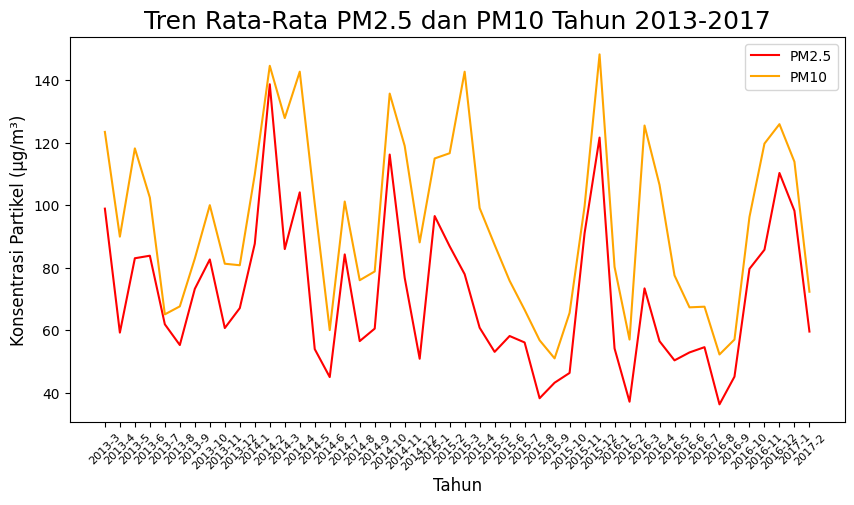

In [ ]:
#Pivot Tabel (Rata-rata PM25 perbulan dalam setiap tahun)
PM25_monthly = df_Changping.groupby(by=['month', 'year']).agg({
    'PM2.5': 'mean'})
PM10_monthly = df_Changping.groupby(by=['month', 'year']).agg({
    'PM10': 'mean'})

#Reset indeks agar dapat digunakan untuk plotting
PM25_monthly.reset_index(inplace=True)
PM10_monthly.reset_index(inplace=True)

#Menggabungkan year dan month untuk sumbu x
PM25_monthly['year-month'] = PM25_monthly['year'].astype(str) + '-' + PM25_monthly['month'].astype(str)
PM10_monthly['year-month'] = PM10_monthly['year'].astype(str) + '-' + PM10_monthly['month'].astype(str)

#Mengurutkan data berdasarkan year dan month
PM25_monthly = PM25_monthly.sort_values(by=['year', 'month'])
PM10_monthly = PM10_monthly.sort_values(by=['year', 'month'])

# Membuat Line Chart
plt.figure(figsize=(10, 5))
plt.title("Tren Rata-Rata PM2.5 dan PM10 Tahun 2013-2017", loc="center", fontsize=18)
plt.plot(PM25_monthly['year-month'], PM25_monthly['PM2.5'], color='red')
plt.plot(PM10_monthly['year-month'], PM10_monthly['PM10'], color='orange')
plt.xlabel('Tahun',size=12)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Konsentrasi Partikel (µg/m³)', size=12)
plt.legend(['PM2.5', 'PM10'])
plt.show()

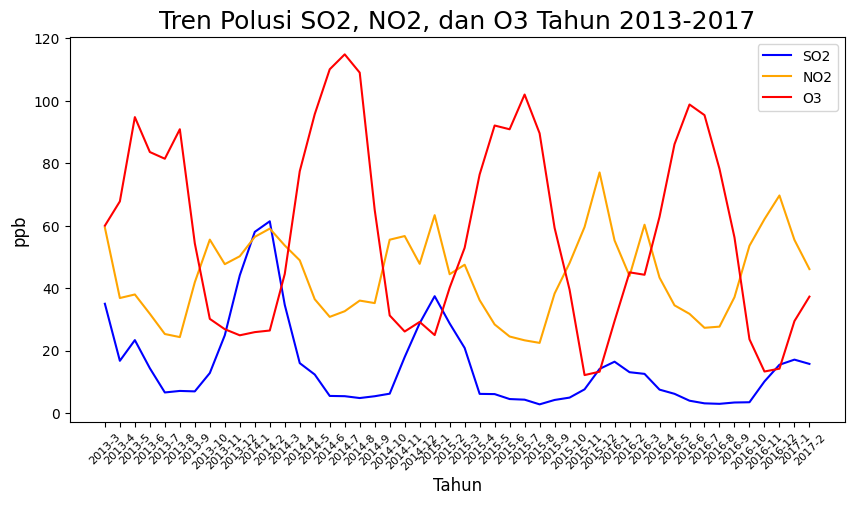

In [30]:
#Pivot Tabel (Rata-rata SO2, NO2, dan O3 perbulan dalam setiap tahun)
SO2_monthly = df_Changping.groupby(by=['month', 'year']).agg({
    'SO2': 'mean'})
NO2_monthly = df_Changping.groupby(by=['month', 'year']).agg({
    'NO2': 'mean'})
O3_monthly = df_Changping.groupby(by=['month', 'year']).agg({
    'O3': 'mean'})

#Reset indeks agar dapat digunakan untuk plotting
SO2_monthly.reset_index(inplace=True)
NO2_monthly.reset_index(inplace=True)
O3_monthly.reset_index(inplace=True)

#Menggabungkan year dan month untuk sumbu x
SO2_monthly['year-month'] = SO2_monthly['year'].astype(str) + '-' + SO2_monthly['month'].astype(str)
NO2_monthly['year-month'] = NO2_monthly['year'].astype(str) + '-' + NO2_monthly['month'].astype(str)
O3_monthly['year-month'] = O3_monthly['year'].astype(str) + '-' + O3_monthly['month'].astype(str)

#Mengurutkan year dan month
SO2_monthly = SO2_monthly.sort_values(by=['year', 'month'])
NO2_monthly = NO2_monthly.sort_values(by=['year', 'month'])
O3_monthly = O3_monthly.sort_values(by=['year', 'month'])

# Membuat Line Chart
plt.figure(figsize=(10, 5))
plt.title("Tren Polusi SO2, NO2, dan O3 Tahun 2013-2017", loc="center", fontsize=18)
plt.plot(SO2_monthly['year-month'], SO2_monthly['SO2'], color='blue')
plt.plot(NO2_monthly['year-month'], NO2_monthly['NO2'], color='orange')
plt.plot(O3_monthly['year-month'], O3_monthly['O3'], color='red')
plt.xlabel('Tahun',size = 12)
plt.xticks(rotation = 45, fontsize = 8)
plt.ylabel('ppb', size = 12)
plt.legend(['SO2', 'NO2', 'O3'])
plt.show()

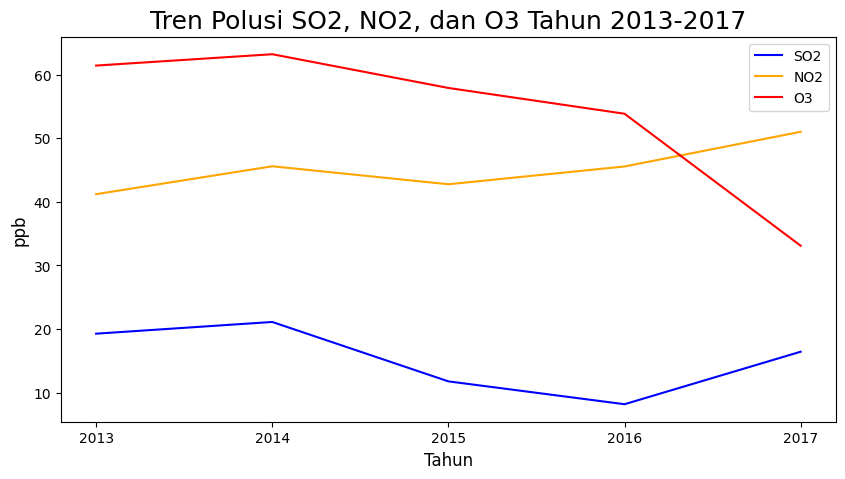

In [ ]:
#Pivot Tabel (Rata-rata SO2, NO2, dan O3 perbulan dalam setiap tahun)
SO2_yearly = df_Changping.groupby(by='year').agg({
    'SO2': 'mean'})
NO2_yearly = df_Changping.groupby(by= 'year').agg({
    'NO2': 'mean'})
O3_yearly = df_Changping.groupby(by= 'year').agg({
    'O3': 'mean'})

#Reset indeks agar dapat digunakan untuk plotting
SO2_yearly.reset_index(inplace=True)
NO2_yearly.reset_index(inplace=True)
O3_yearly.reset_index(inplace=True)

#Mengurutkan urutan Tahun
SO2_yearly = SO2_yearly.sort_values(by='year')
NO2_yearly = NO2_yearly.sort_values(by='year')
O3_yearly = O3_yearly.sort_values(by='year')

# Membuat Line Chart
plt.figure(figsize=(10, 5))
plt.title("Tren Polusi SO2, NO2, dan O3 Tahun 2013-2017", loc="center", fontsize=18)
plt.plot(SO2_yearly['year'], SO2_yearly['SO2'], color='blue')
plt.plot(NO2_yearly['year'], NO2_yearly['NO2'], color='orange')
plt.plot(O3_yearly['year'], O3_yearly['O3'], color='red')
plt.xlabel('Tahun',size = 12)
plt.xticks((SO2_yearly)['year'].unique())
plt.ylabel('ppb', size = 12)
plt.legend(['SO2', 'NO2', 'O3'])
plt.show()

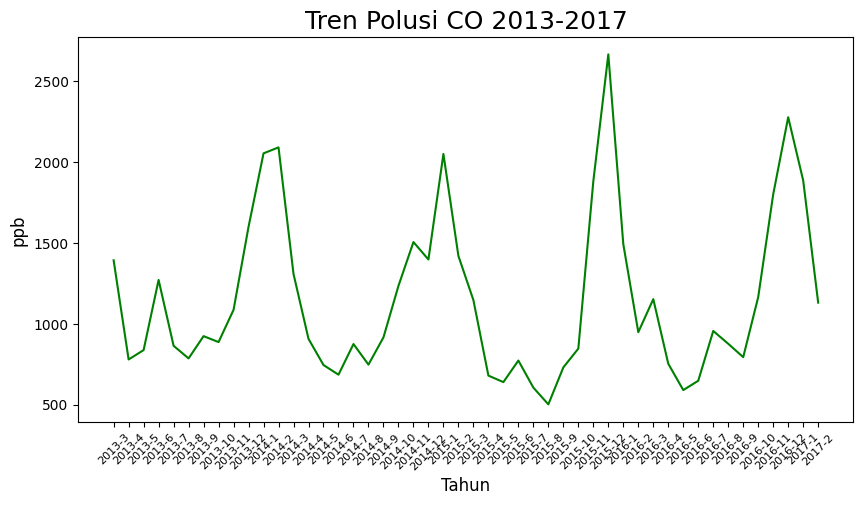

In [ ]:
#Pivot Tabel (Rata-rata PM25 perbulan dalam setiap tahun)
CO_monthly = df_Changping.groupby(by=['month', 'year']).agg({
    'CO': 'mean'})

#Reset indeks agar dapat digunakan untuk plotting
CO_monthly.reset_index(inplace=True)

#Menggabungkan year dan month untuk sumbu x
CO_monthly['year-month'] = CO_monthly['year'].astype(str) + '-' + CO_monthly['month'].astype(str)

#Mengurutkan year dan month
CO_monthly = CO_monthly.sort_values(by=['year', 'month'])

# Membuat Line Chart
plt.figure(figsize=(10, 5))
plt.title("Tren Polusi CO 2013-2017", loc="center", fontsize=18)
plt.plot(CO_monthly['year-month'], CO_monthly['CO'], color='green')
plt.xlabel('Tahun',size=12)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('ppb',size=12)
plt.show()

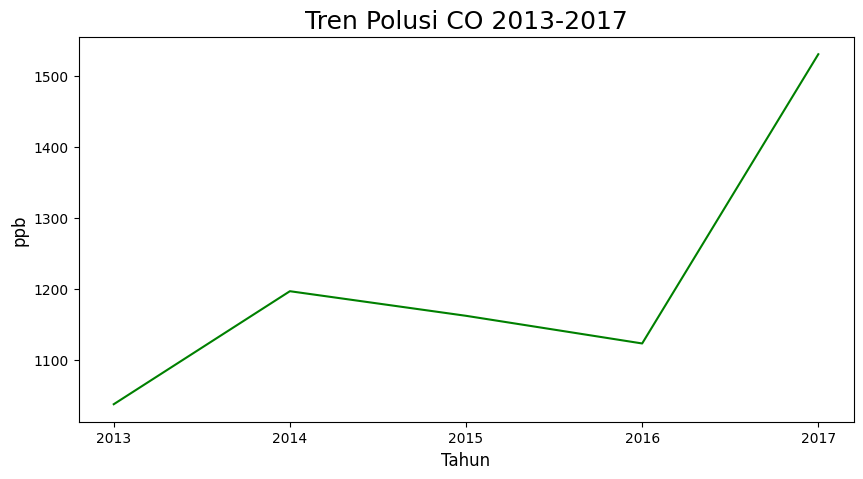

In [ ]:
#Pivot Tabel (Rata-rata CO Tahunan dalam setiap tahun)
CO_yearly = df_Changping.groupby(by='year').agg({
    'CO': 'mean'})

#Reset indeks agar dapat digunakan untuk plotting
CO_yearly.reset_index(inplace=True)

#Mengurutkan year dan month
CO_yearly = CO_yearly.sort_values(by='year')

# Membuat Line Chart
plt.figure(figsize=(10, 5))
plt.title("Tren Polusi CO 2013-2017", loc="center", fontsize=18)
plt.plot(CO_yearly['year'], CO_yearly['CO'], color='green')
plt.xticks((CO_yearly)['year'].unique())
plt.xlabel('Tahun',size=12)
plt.ylabel('ppb',size=12)
plt.show()

Insight:
- Secara umum seluruh indikator kualitas udara sangat fluktuatif jika data dilihat secara bulanan. Namun secara tahunan O3 mengalami tren penurunan, CO dan NO2 mengalami tren kenaikan.
- Terdapat pola musiman untuk seluruh indikator kualitas udara (PM2.5, PM10, SO2, NO2, dan CO). Seluruh indikator menunjukkan peningkatan setiap akhir tahun hingga awal tahun dan turun di pertengahan tahun.
- Terdapat pola musiman pada O3 dimana peningkatan terjadi pada pertengahan tahun dan penurunan terjadi di akhir dan awal tahu.

### Pertanyaan 2:
Apakah terdapat pola hubungan antara temperatur (TEMP) dan hujan (RAIN) dengan kualitas udara di Changping?

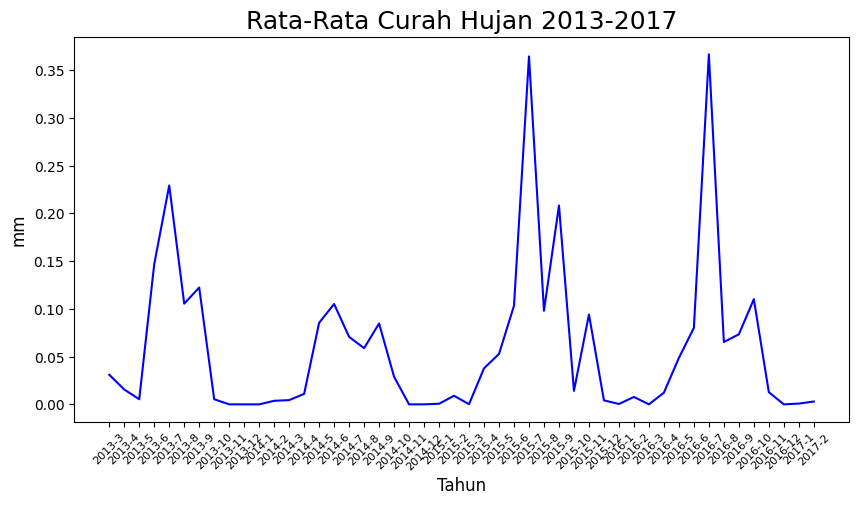

In [ ]:
#Pivot Tabel (Rata-rata CO perbulan dalam setiap tahun)
RAIN_monthly = df_Changping.groupby(by=['month', 'year']).agg({
    'RAIN': 'mean'})

#Reset indeks agar dapat digunakan untuk plotting
RAIN_monthly.reset_index(inplace=True)

#Menggabungkan year dan month untuk sumbu x
RAIN_monthly['year-month'] = RAIN_monthly['year'].astype(str) + '-' + RAIN_monthly['month'].astype(str)

#Mengurutkan year dan month
RAIN_monthly = RAIN_monthly.sort_values(by=['year', 'month'])

# Membuat Line Chart
plt.figure(figsize=(10, 5))
plt.title("Rata-Rata Curah Hujan 2013-2017", loc="center", fontsize=18)
plt.plot(RAIN_monthly['year-month'], RAIN_monthly['RAIN'], color='blue')
plt.xlabel('Tahun',size=12)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('mm',size=12)
plt.show()

Insight:
- Terdapat pola musiman dimana pertengahan tahun intensitas hujan semakin tinggi.

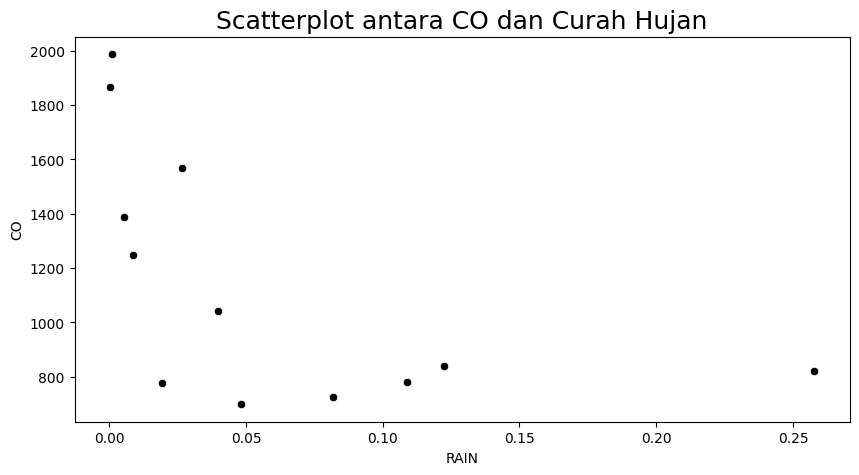

In [ ]:
# Rata - rata curah hujan setiap bulannya dan konsentrasi CO
pivot1 = df_Changping.groupby('month')[['RAIN', 'CO']].mean().reset_index()

# Membuat Scatterplot
plt.figure(figsize=(10, 5))
plt.title("Scatterplot antara CO dan Curah Hujan", loc = "center", fontsize = 18)
sns.scatterplot(pivot1, x="RAIN", y="CO", facecolor="black")
plt.show()


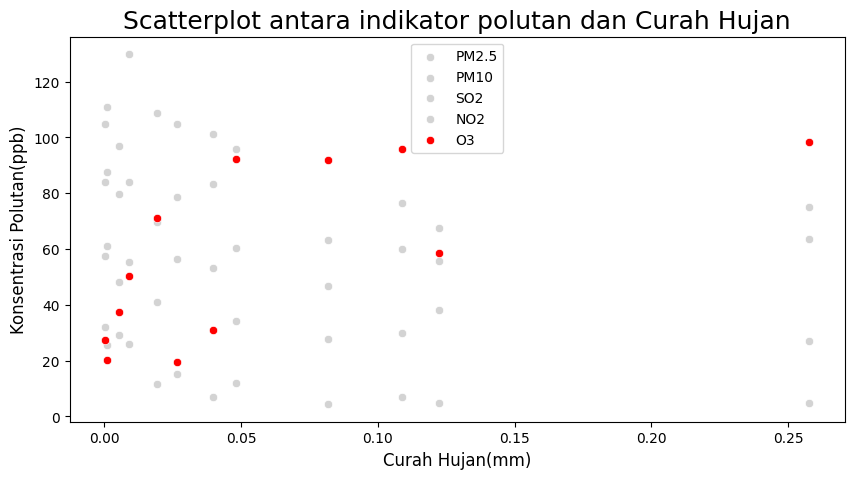

In [ ]:
# Rata - rata curah hujan setiap bulannya dan konsentrasi PM2.5, PM10, SO2, dan NO2
pivot2 = df_Changping.groupby('month')[['RAIN', 'PM2.5']].mean().reset_index()
pivot3 = df_Changping.groupby('month')[['RAIN', 'PM10']].mean().reset_index()
pivot4 = df_Changping.groupby('month')[['RAIN', 'SO2']].mean().reset_index()
pivot5 = df_Changping.groupby('month')[['RAIN', 'NO2']].mean().reset_index()
pivot6 = df_Changping.groupby('month')[['RAIN', 'O3']].mean().reset_index()

# Membuat Scatterplot
plt.figure(figsize=(10, 5))
plt.title("Scatterplot antara indikator polutan dan Curah Hujan", loc = "center", fontsize = 18)
sns.scatterplot(pivot2, x="RAIN", y="PM2.5", facecolor="lightgrey", label = "PM2.5" )
sns.scatterplot(pivot3, x="RAIN", y="PM10", facecolor="lightgrey", label = "PM10")
sns.scatterplot(pivot4, x="RAIN", y="SO2", facecolor="lightgrey", label = "SO2")
sns.scatterplot(pivot5, x="RAIN", y="NO2", facecolor="lightgrey", label = "NO2")
sns.scatterplot(pivot6, x="RAIN", y="O3", facecolor="red", label = "O3")
plt.xlabel('Curah Hujan(mm)',size=12)
plt.ylabel('Konsentrasi Polutan(ppb)',size=12)
plt.legend()
plt.show()

**Insight:**
- Dari scatterplot diatas, curah hujan yang semakin tinggi dapat menurunkan konsentrasi polutan (PM2.5, PM10, SO2, NO2, dan CO).
- Hal yang berbeda ditunjukkan bahwa curah hujan yang semakin tinggi meningkatkan konsentrasi O3.

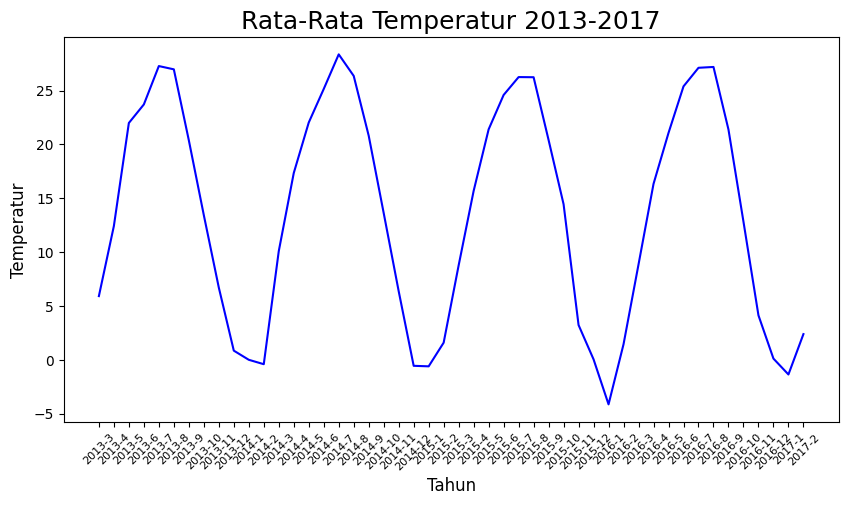

In [ ]:
#Pivot Tabel (Rata-rata temperatur perbulan dalam setiap tahun)
TEMP_monthly = df_Changping.groupby(by=['month', 'year']).agg({
    'TEMP': 'mean'})

#Reset indeks agar dapat digunakan untuk plotting
TEMP_monthly.reset_index(inplace=True)

#Menggabungkan year dan month untuk sumbu x
TEMP_monthly['year-month'] = TEMP_monthly['year'].astype(str) + '-' + TEMP_monthly['month'].astype(str)

#Mengurutkan year dan month
TEMP_monthly = TEMP_monthly.sort_values(by=['year', 'month'])

# Membuat Line Chart
plt.figure(figsize=(10, 5))
plt.title("Rata-Rata Temperatur 2013-2017", loc="center", fontsize=18)
plt.plot(TEMP_monthly['year-month'], TEMP_monthly['TEMP'], color='blue')
plt.xlabel('Tahun',size=12)
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Temperatur',size=12)
plt.show()

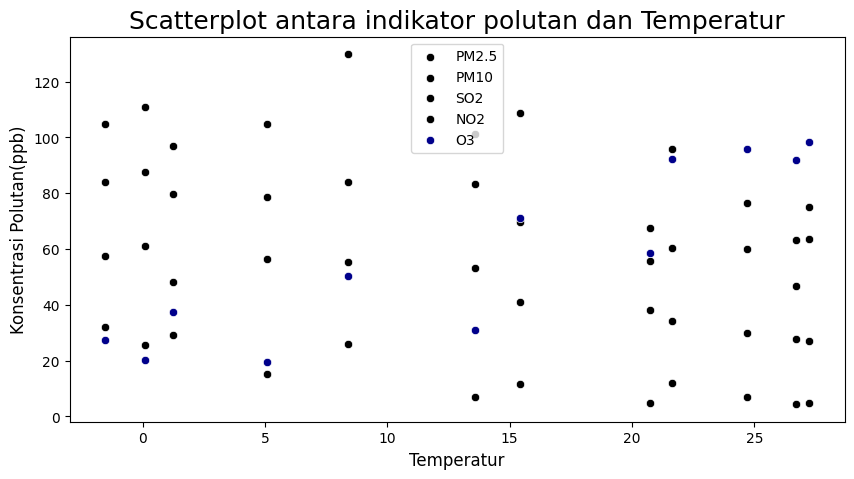

In [ ]:
#Pivot tabel (Rata - rata polutan udara per bulan)
pivot7 = df_Changping.groupby('month')[['TEMP', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean().reset_index()

#Membuat scatterplot
plt.figure(figsize=(10, 5))
plt.title("Scatterplot antara indikator polutan dan Temperatur", loc = "center", fontsize = 18)
sns.scatterplot(pivot7, x="TEMP", y="PM2.5", facecolor="black", label = "PM2.5" )
sns.scatterplot(pivot7, x="TEMP", y="PM10", facecolor="black", label = "PM10")
sns.scatterplot(pivot7, x="TEMP", y="SO2", facecolor="black", label = "SO2" )
sns.scatterplot(pivot7, x="TEMP", y="NO2", facecolor="black", label = "NO2")
sns.scatterplot(pivot7, x="TEMP", y="O3", facecolor="darkblue", label = "O3")
plt.xlabel('Temperatur',size=12)
plt.ylabel('Konsentrasi Polutan(ppb)',size=12)
plt.legend()
plt.show()

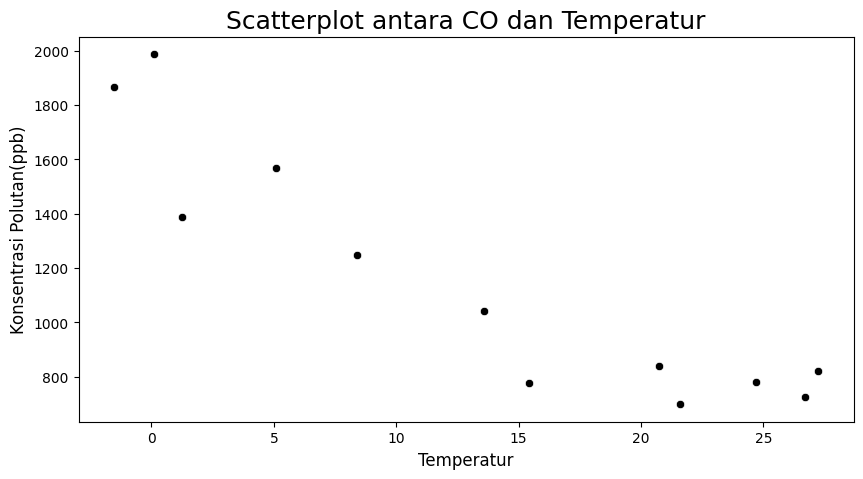

In [ ]:
# Rata - rata curah hujan setiap bulannya dan konsentrasi CO
pivot8 = df_Changping.groupby('month')[['TEMP', 'CO']].mean().reset_index()

# Membuat Scatterplot
plt.figure(figsize=(10, 5))
plt.title("Scatterplot antara CO dan Temperatur", loc = "center", fontsize = 18)
sns.scatterplot(pivot8, x="TEMP", y="CO", facecolor="black")
plt.xlabel('Temperatur',size=12)
plt.ylabel('Konsentrasi Polutan(ppb)',size=12)
plt.show()

Insight:
- Berdasarkan scatterplot ini, ketika temperatur udara semakin tinggi konsentrasi polutan semakin rendah kecuali pada O3.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan hasil analisis menyatakan bahwa tren polutan berfluktuasi dari tahun 2013 - 2017 namun terdapat pola musiman dimana pada polutan dengan jenis PM2.5, PM10, NO2, SO2, dan CO cenderung meningkat pada awal tahun dan akhir tahun. Sementara O3 cenderung meningkat pada pertengahan tahun.

- Hasil analisis korelasi menggunakan scatterplot menyimpulkan bahwa curah hujan dan temperatur yang tinggi menurunkan polutan udara seperti PM2.5, PM10, NO2, SO2, dan CO. Sementara O3 cenderung meningkat pada curah hujan dan temperatur yang tinggi.